In [26]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [27]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : List[str]
    final : str

In [28]:
def first_node(state : AgentState) -> AgentState:
    """ Welcome node """
    
    state["final"] = f"{state["name"]}, welcome to the system!"
    return state

def second_node(state : AgentState) -> AgentState:
    """ Age node """
    
    state["final"] =  state["final"] +  f" You are {state['age']} years old! "
    return state

def third_node(state : AgentState) -> AgentState:
    """ skills node """
    skills = state["skills"]
    skills_str = ", ".join(skills)
    state["final"] = state["final"] + (f" You have skills in: {skills_str}" if len(skills) > 0 else "")
    return state

In [29]:
graph = StateGraph(AgentState)

graph.add_node("first_node" , first_node)
graph.add_node("second_node" , second_node)
graph.add_node("third_node" , third_node)

In [30]:
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

In [31]:
app = graph.compile()

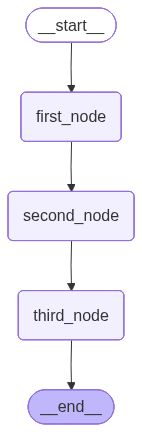

In [33]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
result = app.invoke({"name" : "Fitiavane", "age" : 22, "skills" : ["python", "javascript", "java"]})

In [34]:
result

{'name': 'Fitiavane',
 'age': 22,
 'skills': ['python', 'javascript', 'java'],
 'final': 'Fitiavane, welcome to the system! You are 22 years old!  You have skills in: python, javascript, java'}